In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [4]:
train_data = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/train.csv')
test_data = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/test.csv')

             SibSp     Parch       Age      Fare       Sex  Embarked  Survived
SibSp     1.000000  0.414838 -0.232625  0.159651 -0.114631  0.066654 -0.035322
Parch     0.414838  1.000000 -0.179191  0.216225 -0.245489  0.038322  0.081629
Age      -0.232625 -0.179191  1.000000  0.091566  0.084153 -0.022239 -0.069809
Fare      0.159651  0.216225  0.091566  1.000000 -0.182333 -0.221226  0.257307
Sex      -0.114631 -0.245489  0.084153 -0.182333  1.000000  0.104057 -0.543351
Embarked  0.066654  0.038322 -0.022239 -0.221226  0.104057  1.000000 -0.163517
Survived -0.035322  0.081629 -0.069809  0.257307 -0.543351 -0.163517  1.000000


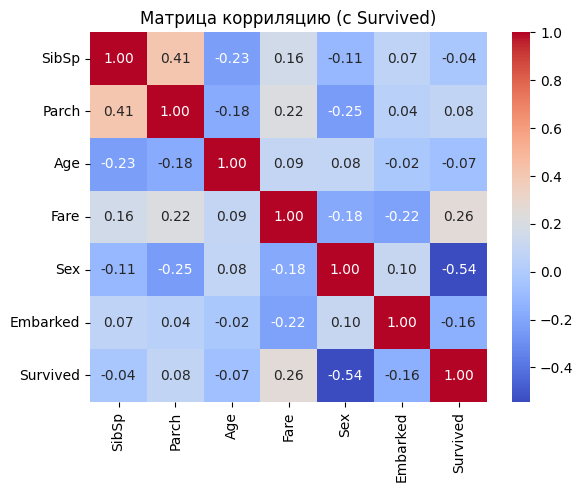

In [29]:
features = ['SibSp', 'Parch', 'Age', 'Fare', 'Sex', 'Embarked']
y = train_data['Survived']
X = train_data[features].copy()

for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X.fillna(X.mean(), inplace=True)
X['Survived'] = y.values 

cov_matrix = X.corr()

print(cov_matrix)

sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Матрица корриляцию (с Survived)")
plt.show()


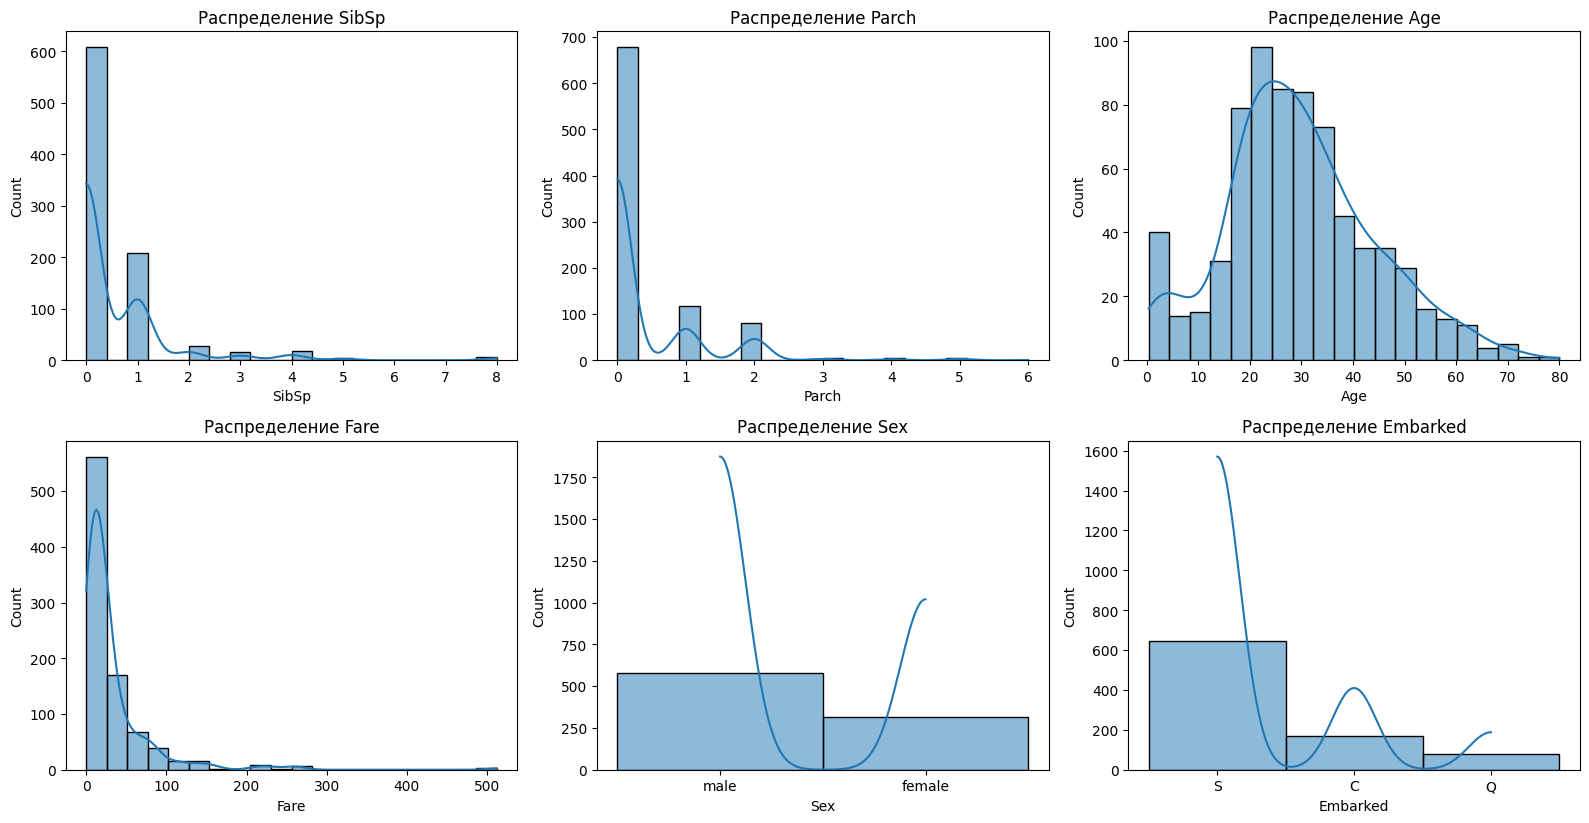

In [19]:
def plot_distributions(data):
    features = data.columns
    plt.figure(figsize=(16, 12))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[feature], kde=True, bins=20)
        plt.title(f"Распределение {feature}")
    plt.tight_layout()
    plt.show()

plot_distributions(train_data[['SibSp','Parch','Age', 'Fare', 'Sex', 'Embarked']])


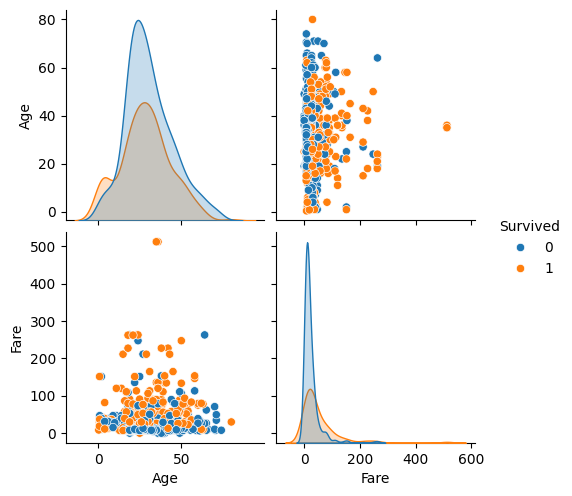

In [21]:
sns.pairplot(train_data[['Age', 'Fare', 'Survived']].dropna(), hue='Survived', diag_kind='kde')
plt.show()

In [31]:
report_path = '/Users/pahan/Desktop/Basics-of-Static-Training/reports/eda_report.md'

with open(report_path, 'w') as report_file:
    report_file.write("Отчёт по разведочному анализу данных (EDA)\n")
    report_file.write("=" * 50 + "\n\n")
    report_file.write("1. Распределение признаков:\n")
    for feature in ['Pclass', 'Age', 'Fare', 'Sex', 'Embarked']:
        report_file.write(f"- {feature}: {train_data[feature].describe()}\n\n")

    report_file.write("2. Корреляционная матрица:\n")
    report_file.write(cov_matrix.to_string())